In [83]:
import time
import os
import argparse
import json
import cv2
import sys
sys.path += [os.path.abspath('keras-yolo3-master')]

from utils.utils import get_yolo_boxes, makedirs
from utils.bbox import draw_boxes
from tensorflow.keras.models import load_model
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from panel_disconnect import disconnect




# Define Image Path and output

In [84]:
input_path   = '100_Example'
output_path  = 'Result_Complete_Example/'
makedirs(output_path)

# Load Model (Panel Detector, Soiling and Diode)

In [85]:
## Config of trained model, change this for use different trained model
config_path_panel  = 'config_full_yolo_panel_infer.json' #Panel
config_path_soiling  = 'config_full_yolo_fault_1_infer.json' #Soiling
config_path_diode  = 'config_full_yolo_fault_4_infer.json'  #Diode




## Parameters of detection
net_h, net_w = 416, 416 # a multiple of 32, the smaller the faster
obj_thresh, nms_thresh, nms_thresh_panel = 0.5, 0.45, 0.3

####################################################
#####   Load the model Panel Detector  #############
####################################################
with open(config_path_panel) as config_buffer:
        config_panel = json.load(config_buffer)

os.environ['CUDA_VISIBLE_DEVICES'] = config_panel['train']['gpus']
infer_model_panel = load_model(config_panel['train']['saved_weights_name'])

####################################################
#####   Load the model Soiling  #############
####################################################
with open(config_path_soiling) as config_buffer:
        config_soiling = json.load(config_buffer)

infer_model_soiling = load_model(config_soiling['train']['saved_weights_name'])

####################################################
#####   Load the model Soiling  #############
####################################################
with open(config_path_diode) as config_buffer:
        config_diode = json.load(config_buffer)

infer_model_diode = load_model(config_diode['train']['saved_weights_name'])

In [86]:
# Load Image paths

In [87]:
image_paths = []

if os.path.isdir(input_path):
    for inp_file in os.listdir(input_path):
        image_paths += [input_path + inp_file]
else:
    image_paths += [input_path]

image_paths = [inp_file for inp_file in image_paths if (inp_file[-4:] in ['.jpg', '.png', 'JPEG'])]

# the main loop
times = []

In [88]:
# Detection of images

In [89]:
for image_path in image_paths:
    image = cv2.imread(image_path)
    print(image_path)
    start = time.time()
    # predict the bounding boxes
    boxes_soiling = get_yolo_boxes(infer_model_soiling, [image], net_h, net_w, config_soiling['model']['anchors'], obj_thresh, nms_thresh)[0]
    boxes_diode = get_yolo_boxes(infer_model_diode, [image], net_h, net_w, config_diode['model']['anchors'], obj_thresh, nms_thresh)[0]
    boxes_panel = get_yolo_boxes(infer_model_panel, [image], net_h, net_w, config_panel['model']['anchors'], obj_thresh, nms_thresh_panel)[0]
    boxes_panel = [box for box in boxes_panel if box.get_score() > obj_thresh]
    boxes_disc = disconnect(image, boxes_panel, z_thresh = 1.8)
    print('Elapsed time = {}'.format(time.time() - start))
    times.append(time.time() - start)
    # Draw boxes
    draw_boxes(image, boxes_soiling, config_soiling['model']['labels'], obj_thresh, number_color = 0)
    draw_boxes(image, boxes_diode, config_diode['model']['labels'], obj_thresh, number_color = 2)
    draw_boxes(image, boxes_disc, ['disc'], obj_thresh, number_color = 5)
    
    # write the image with bounding boxes to file
    cv2.imwrite(output_path + image_path.split('/')[-1], np.uint8(image))

file = open(args.output + '/time.txt','w')
file.write('Tiempo promedio:' + str(np.mean(times)))
file.close()

Train&Test_C/images/Mision 55_DJI_0259.jpg
Elapsed time = 12.23534893989563
Train&Test_C/images/Mision 13_DJI_0022.jpg
Elapsed time = 7.099382162094116
Train&Test_C/images/Mision 12_DJI_0052.jpg
Elapsed time = 8.388407945632935
Train&Test_C/images/Mision 15_DJI_0075.jpg
Elapsed time = 7.458628177642822
Train&Test_C/images/Mision 42_DJI_0059.jpg
Elapsed time = 7.744646310806274
Train&Test_C/images/Mision 24_DJI_0063.jpg
Elapsed time = 7.37685489654541
Train&Test_C/images/Mision 49_DJI_0068.jpg
Elapsed time = 8.017214298248291
Train&Test_C/images/Mision 45_DJI_0080.jpg
Elapsed time = 7.004529714584351
Train&Test_C/images/Mision 18_DJI_0047.jpg
Elapsed time = 7.095032215118408
Train&Test_C/images/Mision 25_DJI_0020.jpg
Elapsed time = 7.880721807479858
Train&Test_C/images/Mision 27_DJI_0034.jpg
Elapsed time = 7.111236810684204
Train&Test_C/images/Mision 11_DJI_0078.jpg
Elapsed time = 7.385431528091431
Train&Test_C/images/Mision 26_DJI_0078.jpg
Elapsed time = 7.303341865539551
Train&Test_C/

Elapsed time = 6.941727876663208
Train&Test_C/images/Mision 12_DJI_0018.jpg
Elapsed time = 7.5569846630096436
Train&Test_C/images/Mision 12_DJI_0073.jpg
Elapsed time = 7.809744596481323
Train&Test_C/images/Mision 26_DJI_0064.jpg
Elapsed time = 7.067970514297485
Train&Test_C/images/Mision 28_DJI_0080.jpg
Elapsed time = 7.545677423477173
Train&Test_C/images/Mision 55_DJI_0267.jpg
Elapsed time = 6.859062433242798
Train&Test_C/images/Mision 10_DJI_0058.jpg
Elapsed time = 7.127552270889282
Train&Test_C/images/Mision 47_DJI_0085.jpg
Elapsed time = 7.008105993270874
Train&Test_C/images/Mision 15_DJI_0002.jpg
Elapsed time = 7.016063451766968
Train&Test_C/images/Mision 14_DJI_0084.jpg
Elapsed time = 6.930208206176758
Train&Test_C/images/Mision 25_DJI_0050.jpg
Elapsed time = 6.956559658050537
Train&Test_C/images/Mision 13_DJI_0045.jpg
Elapsed time = 7.178380012512207
Train&Test_C/images/Mision 51_DJI_0178.jpg
Elapsed time = 6.857294082641602
Train&Test_C/images/Mision 13_DJI_0042.jpg
Elapsed tim

Elapsed time = 9.296509742736816
Train&Test_C/images/Mision 21_DJI_0007.jpg
Elapsed time = 7.229199647903442
Train&Test_C/images/Mision 18_DJI_0022.jpg
Elapsed time = 6.250933408737183
Train&Test_C/images/Mision 19_DJI_0007.jpg
Elapsed time = 7.686774015426636
Train&Test_C/images/Mision 13_DJI_0037.jpg
Elapsed time = 7.560818195343018
Train&Test_C/images/Mision 4_DJI_0087.jpg
Elapsed time = 6.1127400398254395
Train&Test_C/images/Mision 55_DJI_0264.jpg
Elapsed time = 6.344544172286987
Train&Test_C/images/Mision 22_DJI_0067.jpg
Elapsed time = 7.525118112564087
Train&Test_C/images/Mision 16_DJI_0057.jpg
Elapsed time = 8.435068368911743
Train&Test_C/images/Mision 38_DJI_0003.jpg
Elapsed time = 6.936667442321777
Train&Test_C/images/Mision 45_DJI_0073.jpg
Elapsed time = 6.810603141784668
Train&Test_C/images/Mision 36_DJI_0091.jpg
Elapsed time = 7.486711502075195
Train&Test_C/images/Mision 12_DJI_0031.jpg
Elapsed time = 8.601773023605347
Train&Test_C/images/Mision 25_DJI_0028.jpg
Elapsed time

Elapsed time = 5.660246133804321
Train&Test_C/images/Mision 20_DJI_0062.jpg
Elapsed time = 5.43843150138855
Train&Test_C/images/Mision 4_DJI_0023.jpg
Elapsed time = 5.359705686569214
Train&Test_C/images/Mision 23_DJI_0025.jpg
Elapsed time = 5.458603620529175
Train&Test_C/images/Mision 22_DJI_0092.jpg
Elapsed time = 5.178526163101196
Train&Test_C/images/Mision 21_DJI_0036.jpg
Elapsed time = 5.389798879623413
Train&Test_C/images/Mision 30_DJI_0050.jpg
Elapsed time = 5.30771803855896
Train&Test_C/images/Mision 24_DJI_0077.jpg
Elapsed time = 5.208688735961914
Train&Test_C/images/Mision 4_DJI_0048.jpg
Elapsed time = 5.387272357940674
Train&Test_C/images/Mision 15_DJI_0025.jpg
Elapsed time = 5.580476760864258
Train&Test_C/images/Mision 38_DJI_0034.jpg
Elapsed time = 5.350365877151489
Train&Test_C/images/Mision 39_DJI_0045.jpg
Elapsed time = 5.470240592956543
Train&Test_C/images/Mision 16_DJI_0060.jpg
Elapsed time = 5.253940105438232
Train&Test_C/images/Mision 32_DJI_0085.jpg
Elapsed time = 5

Elapsed time = 6.3533666133880615
Train&Test_C/images/Mision 26_DJI_0057.jpg
Elapsed time = 6.205275297164917
Train&Test_C/images/Mision 15_DJI_0029.jpg
Elapsed time = 6.94105076789856
Train&Test_C/images/Mision 32_DJI_0005.jpg
Elapsed time = 6.570327043533325
Train&Test_C/images/Mision 32_DJI_0057.jpg
Elapsed time = 6.433659315109253
Train&Test_C/images/Mision 22_DJI_0075.jpg
Elapsed time = 6.177904367446899
Train&Test_C/images/Mision 3_DJI_0062.jpg
Elapsed time = 6.403854608535767
Train&Test_C/images/Mision 13_DJI_0003.jpg
Elapsed time = 6.932696342468262
Train&Test_C/images/Mision 35_DJI_0020.jpg
Elapsed time = 6.686039924621582
Train&Test_C/images/Mision 23_DJI_0085.jpg
Elapsed time = 7.037535905838013
Train&Test_C/images/Mision 12_DJI_0066.jpg
Elapsed time = 6.5568623542785645
Train&Test_C/images/Mision 28_DJI_0078.jpg
Elapsed time = 6.053854942321777
Train&Test_C/images/Mision 32_DJI_0028.jpg
Elapsed time = 5.963791131973267
Train&Test_C/images/Mision 23_DJI_0027.jpg
Elapsed time

Elapsed time = 6.969411134719849
Train&Test_C/images/Mision 11_DJI_0045.jpg
Elapsed time = 6.6566290855407715
Train&Test_C/images/Mision 10_DJI_0096.jpg
Elapsed time = 7.594812870025635
Train&Test_C/images/Mision 24_DJI_0029.jpg
Elapsed time = 6.5777764320373535
Train&Test_C/images/Mision 11_DJI_0075.jpg
Elapsed time = 7.546080589294434
Train&Test_C/images/Mision 11_DJI_0065.jpg
Elapsed time = 6.4462668895721436
Train&Test_C/images/Mision 51_DJI_0115.jpg
Elapsed time = 6.231406927108765
Train&Test_C/images/Mision 16_DJI_0024.jpg
Elapsed time = 6.1355204582214355
Train&Test_C/images/Mision 49_DJI_0086.jpg
Elapsed time = 6.4291839599609375
Train&Test_C/images/Mision 35_DJI_0089.jpg
Elapsed time = 6.018494606018066
Train&Test_C/images/Mision 54_DJI_0102.jpg
Elapsed time = 6.111525774002075
Train&Test_C/images/Mision 14_DJI_0069.jpg
Elapsed time = 6.1384947299957275
Train&Test_C/images/Mision 29_DJI_0016.jpg
Elapsed time = 6.595492362976074
Train&Test_C/images/Mision 20_DJI_0073.jpg
Elapse

Elapsed time = 4.894348859786987
Train&Test_C/images/Mision 32_DJI_0023.jpg
Elapsed time = 4.872694730758667
Train&Test_C/images/Mision 48_DJI_0069.jpg
Elapsed time = 4.918405055999756
Train&Test_C/images/Mision 38_DJI_0077.jpg
Elapsed time = 4.97846794128418
Train&Test_C/images/Mision 38_DJI_0036.jpg
Elapsed time = 4.965039253234863
Train&Test_C/images/Mision 22_DJI_0012.jpg
Elapsed time = 4.85624098777771
Train&Test_C/images/Mision 28_DJI_0003.jpg
Elapsed time = 4.855688571929932
Train&Test_C/images/Mision 11_DJI_0039.jpg
Elapsed time = 5.046348810195923
Train&Test_C/images/Mision 32_DJI_0030.jpg
Elapsed time = 4.773685455322266
Train&Test_C/images/Mision 16_DJI_0052.jpg
Elapsed time = 5.046910524368286
Train&Test_C/images/Mision 18_DJI_0082.jpg
Elapsed time = 4.94317889213562
Train&Test_C/images/Mision 36_DJI_0020.jpg
Elapsed time = 5.134766340255737
Train&Test_C/images/Mision 22_DJI_0093.jpg
Elapsed time = 4.806722164154053
Train&Test_C/images/Mision 15_DJI_0078.jpg
Elapsed time = 

Elapsed time = 8.674484491348267
Train&Test_C/images/Mision 15_DJI_0077.jpg
Elapsed time = 13.729681015014648
Train&Test_C/images/Mision 14_DJI_0065.jpg
Elapsed time = 8.211515426635742
Train&Test_C/images/Mision 49_DJI_0048.jpg
Elapsed time = 9.263334512710571
Train&Test_C/images/Mision 51_DJI_0187.jpg
Elapsed time = 8.672373533248901
Train&Test_C/images/Mision 24_DJI_0006.jpg
Elapsed time = 9.172949314117432
Train&Test_C/images/Mision 9_DJI_0084.jpg
Elapsed time = 9.18414855003357
Train&Test_C/images/Mision 22_DJI_0018.jpg
Elapsed time = 9.014830589294434
Train&Test_C/images/Mision 27_DJI_0015.jpg
Elapsed time = 9.050181865692139
Train&Test_C/images/Mision 14_DJI_0083.jpg
Elapsed time = 9.393923044204712
Train&Test_C/images/Mision 24_DJI_0008.jpg
Elapsed time = 9.455132484436035
Train&Test_C/images/Mision 10_DJI_0146.jpg
Elapsed time = 9.710626125335693
Train&Test_C/images/Mision 12_DJI_0090.jpg
Elapsed time = 9.779698610305786
Train&Test_C/images/Mision 50_DJI_0002.jpg
Elapsed time 

Elapsed time = 10.249688386917114
Train&Test_C/images/Mision 26_DJI_0018.jpg
Elapsed time = 9.759418249130249
Train&Test_C/images/Mision 10_DJI_0027.jpg
Elapsed time = 9.686805725097656
Train&Test_C/images/Mision 36_DJI_0069.jpg
Elapsed time = 9.814342737197876
Train&Test_C/images/Mision 6_DJI_0051.jpg
Elapsed time = 9.606988191604614
Train&Test_C/images/Mision 14_DJI_0073.jpg
Elapsed time = 9.204921007156372
Train&Test_C/images/Mision 9_DJI_0082.jpg
Elapsed time = 9.309146642684937
Train&Test_C/images/Mision 22_DJI_0047.jpg
Elapsed time = 10.202087879180908
Train&Test_C/images/Mision 9_DJI_0077.jpg
Elapsed time = 9.429774761199951
Train&Test_C/images/Mision 27_DJI_0001.jpg
Elapsed time = 9.572099685668945
Train&Test_C/images/Mision 39_DJI_0052.jpg
Elapsed time = 10.53365159034729
Train&Test_C/images/Mision 36_DJI_0052.jpg
Elapsed time = 10.36285948753357
Train&Test_C/images/Mision 16_DJI_0079.jpg
Elapsed time = 10.404571056365967
Train&Test_C/images/Mision 30_DJI_0031.jpg
Elapsed time

Elapsed time = 6.112104177474976
Train&Test_C/images/Mision 14_DJI_0056.jpg
Elapsed time = 6.169782638549805
Train&Test_C/images/Mision 24_DJI_0036.jpg
Elapsed time = 6.423400640487671
Train&Test_C/images/Mision 35_DJI_0023.jpg
Elapsed time = 6.344681739807129
Train&Test_C/images/Mision 38_DJI_0056.jpg
Elapsed time = 6.462806701660156
Train&Test_C/images/Mision 6_DJI_0055.jpg
Elapsed time = 6.5449395179748535
Train&Test_C/images/Mision 32_DJI_0004.jpg
Elapsed time = 5.926751136779785
Train&Test_C/images/Mision 34_DJI_0009.jpg
Elapsed time = 6.1715404987335205
Train&Test_C/images/Mision 30_DJI_0077.jpg
Elapsed time = 6.178799867630005
Train&Test_C/images/Mision 49_DJI_0033.jpg
Elapsed time = 6.078259468078613
Train&Test_C/images/Mision 11_DJI_0051.jpg
Elapsed time = 6.485445737838745
Train&Test_C/images/Mision 47_DJI_0087.jpg
Elapsed time = 6.376349449157715
Train&Test_C/images/Mision 47_DJI_0067.jpg
Elapsed time = 6.483611345291138
Train&Test_C/images/Mision 36_DJI_0059.jpg
Elapsed tim

Elapsed time = 6.106258153915405
Train&Test_C/images/Mision 17_DJI_0086.jpg
Elapsed time = 6.440626621246338
Train&Test_C/images/Mision 21_DJI_0089.jpg
Elapsed time = 6.6635308265686035
Train&Test_C/images/Mision 20_DJI_0011.jpg
Elapsed time = 7.290406227111816
Train&Test_C/images/Mision 32_DJI_0073.jpg
Elapsed time = 7.4834511280059814
Train&Test_C/images/Mision 44_DJI_0007.jpg
Elapsed time = 6.599250316619873
Train&Test_C/images/Mision 22_DJI_0030.jpg
Elapsed time = 7.6546220779418945
Train&Test_C/images/Mision 36_DJI_0080.jpg
Elapsed time = 6.920478105545044
Train&Test_C/images/Mision 10_DJI_0017.jpg
Elapsed time = 7.247495651245117
Train&Test_C/images/Mision 21_DJI_0076.jpg
Elapsed time = 7.324803352355957
Train&Test_C/images/Mision 15_DJI_0001.jpg
Elapsed time = 6.4925925731658936
Train&Test_C/images/Mision 14_DJI_0070.jpg
Elapsed time = 6.874195575714111
Train&Test_C/images/Mision 22_DJI_0017.jpg
Elapsed time = 7.8483664989471436
Train&Test_C/images/Mision 49_DJI_0043.jpg
Elapsed

Elapsed time = 5.759326934814453
Train&Test_C/images/Mision 5_DJI_0049.jpg
Elapsed time = 6.294309139251709
Train&Test_C/images/Mision 35_DJI_0077.jpg
Elapsed time = 5.636328458786011
Train&Test_C/images/Mision 46_DJI_0084.jpg
Elapsed time = 6.18484902381897
Train&Test_C/images/Mision 15_DJI_0055.jpg
Elapsed time = 5.963520288467407
Train&Test_C/images/Mision 24_DJI_0007.jpg
Elapsed time = 6.114861011505127
Train&Test_C/images/Mision 38_DJI_0074.jpg
Elapsed time = 6.1231043338775635
Train&Test_C/images/Mision 53_DJI_0081.jpg
Elapsed time = 5.62850284576416
Train&Test_C/images/Mision 16_DJI_0063.jpg
Elapsed time = 6.129406213760376
Train&Test_C/images/Mision 27_DJI_0086.jpg
Elapsed time = 6.039278745651245
Train&Test_C/images/Mision 34_DJI_0031.jpg
Elapsed time = 5.749123811721802
Train&Test_C/images/Mision 52_DJI_0290.jpg
Elapsed time = 5.7452919483184814
Train&Test_C/images/Mision 16_DJI_0086.jpg
Elapsed time = 6.3005688190460205
Train&Test_C/images/Mision 18_DJI_0057.jpg
Elapsed time

Elapsed time = 6.7549355030059814
Train&Test_C/images/Mision 12_DJI_0094.jpg
Elapsed time = 7.366140842437744
Train&Test_C/images/Mision 16_DJI_0087.jpg
Elapsed time = 7.1163489818573
Train&Test_C/images/Mision 20_DJI_0069.jpg
Elapsed time = 7.221168041229248
Train&Test_C/images/Mision 26_DJI_0005.jpg
Elapsed time = 6.4101550579071045
Train&Test_C/images/Mision 26_DJI_0058.jpg
Elapsed time = 6.648497819900513
Train&Test_C/images/Mision 10_DJI_0154.jpg
Elapsed time = 7.767284154891968
Train&Test_C/images/Mision 9_DJI_0022.jpg
Elapsed time = 6.927276611328125
Train&Test_C/images/Mision 49_DJI_0080.jpg
Elapsed time = 7.5896875858306885
Train&Test_C/images/Mision 12_DJI_0040.jpg
Elapsed time = 8.226977109909058
Train&Test_C/images/Mision 49_DJI_0050.jpg
Elapsed time = 7.574274063110352
Train&Test_C/images/Mision 9_DJI_0016.jpg
Elapsed time = 6.704466342926025
Train&Test_C/images/Mision 24_DJI_0035.jpg
Elapsed time = 7.37353777885437
Train&Test_C/images/Mision 42_DJI_0025.jpg
Elapsed time =

Elapsed time = 9.776486873626709
Train&Test_C/images/Mision 22_DJI_0011.jpg
Elapsed time = 10.444124937057495
Train&Test_C/images/Mision 45_DJI_0074.jpg
Elapsed time = 10.027673482894897
Train&Test_C/images/Mision 32_DJI_0015.jpg
Elapsed time = 9.895720720291138
Train&Test_C/images/Mision 26_DJI_0077.jpg
Elapsed time = 9.889650106430054
Train&Test_C/images/Mision 21_DJI_0046.jpg
Elapsed time = 10.075986862182617
Train&Test_C/images/Mision 19_DJI_0037.jpg
Elapsed time = 10.47367787361145
Train&Test_C/images/Mision 23_DJI_0087.jpg
Elapsed time = 9.964440107345581
Train&Test_C/images/Mision 45_DJI_0005.jpg
Elapsed time = 9.680124044418335
Train&Test_C/images/Mision 36_DJI_0047.jpg
Elapsed time = 9.720555305480957
Train&Test_C/images/Mision 10_DJI_0115.jpg
Elapsed time = 10.763589859008789
Train&Test_C/images/Mision 2_DJI_0025.jpg
Elapsed time = 7.48161768913269
Train&Test_C/images/Mision 5_DJI_0068.jpg
Elapsed time = 6.831650257110596
Train&Test_C/images/Mision 22_DJI_0019.jpg
Elapsed tim

Elapsed time = 9.404383659362793
Train&Test_C/images/Mision 17_DJI_0006.jpg
Elapsed time = 9.807775974273682
Train&Test_C/images/Mision 49_DJI_0053.jpg
Elapsed time = 8.86230754852295
Train&Test_C/images/Mision 13_DJI_0046.jpg
Elapsed time = 10.655514001846313
Train&Test_C/images/Mision 10_DJI_0008.jpg
Elapsed time = 8.651552200317383
Train&Test_C/images/Mision 17_DJI_0029.jpg
Elapsed time = 8.310797929763794
Train&Test_C/images/Mision 10_DJI_0172.jpg
Elapsed time = 7.73004150390625
Train&Test_C/images/Mision 13_DJI_0026.jpg
Elapsed time = 7.311877727508545
Train&Test_C/images/Mision 1_DJI_0031.jpg
Elapsed time = 6.814521074295044
Train&Test_C/images/Mision 9_DJI_0015.jpg
Elapsed time = 7.033337831497192
Train&Test_C/images/Mision 17_DJI_0002.jpg
Elapsed time = 6.724763870239258
Train&Test_C/images/Mision 5_DJI_0048.jpg
Elapsed time = 7.102282285690308
Train&Test_C/images/Mision 18_DJI_0035.jpg
Elapsed time = 6.73450493812561
Train&Test_C/images/Mision 10_DJI_0092.jpg
Elapsed time = 7.

NameError: name 'args' is not defined

In [ ]:
# Example One image

Train&Test_C/images/Mision 22_DJI_0014.jpg
Elapsed time = 6.293553352355957


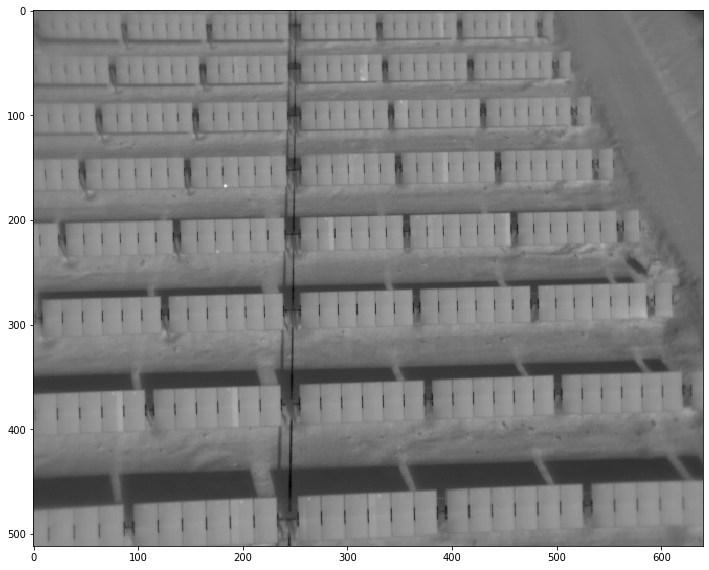

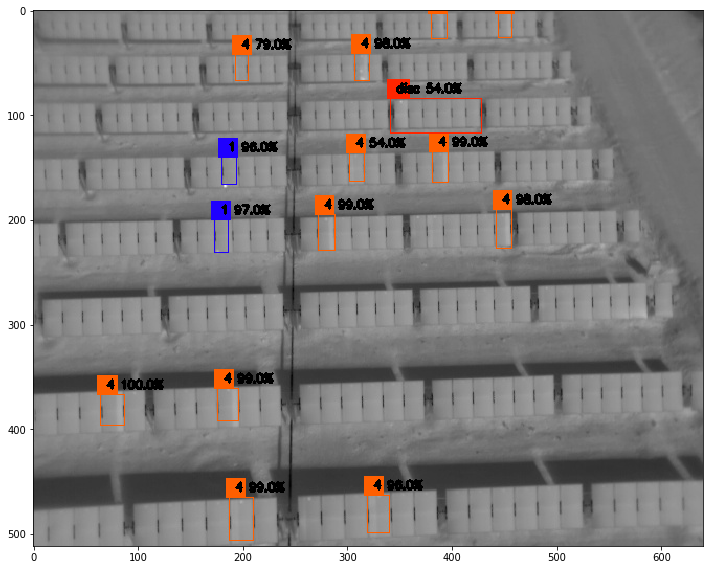

In [90]:
image_path = image_paths[70]

image = cv2.imread(image_path)
plt.figure(figsize=(12, 10))
plt.imshow(image)
print(image_path)

start = time.time()
# predict the bounding boxes
boxes_soiling = get_yolo_boxes(infer_model_soiling, [image], net_h, net_w, config_soiling['model']['anchors'], obj_thresh, nms_thresh)[0]
boxes_diode = get_yolo_boxes(infer_model_diode, [image], net_h, net_w, config_diode['model']['anchors'], obj_thresh, nms_thresh)[0]
boxes_panel = get_yolo_boxes(infer_model_panel, [image], net_h, net_w, config_panel['model']['anchors'], obj_thresh, nms_thresh_panel)[0]
boxes_panel = [box for box in boxes_panel if box.get_score() > obj_thresh]
boxes_disc = disconnect(image, boxes_panel, z_thresh = 1.8)
# Draw boxes
draw_boxes(image, boxes_soiling, config_soiling['model']['labels'], obj_thresh, number_color = 0)
draw_boxes(image, boxes_diode, config_diode['model']['labels'], obj_thresh, number_color = 2)
draw_boxes(image, boxes_disc, ['disc'], obj_thresh, number_color = 5)
print('Elapsed time = {}'.format(time.time() - start))
times.append(time.time() - start)
plt.figure(figsize=(12, 10))
plt.imshow(image)
